# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**   - Omkar Jadhav

# **Project Summary -**

The Airbnb Listings Exploratory Data Analysis (EDA) project aims to analyze property listings data to gain valuable insights into pricing trends, property distribution, and factors influencing booking preferences.
By examining attributes such as neighborhood, room type, price, and reviews, this project provides a deeper understanding of host behavior, customer demand, and location-based patterns.

Through various visualizations and statistical analyses, we identify how location, room category, and customer feedback affect pricing and occupancy.
The analysis ultimately helps uncover market dynamics and provides data-backed recommendations for optimizing pricing strategies and improving listing performance.

# **GitHub Link -**

https://github.com/Omkar2807/Data-Analysis/

# **Problem Statement**


Airbnb operates in a competitive online marketplace where both guests and hosts aim for the best experience and value. However, price variation and inconsistent demand across neighborhoods make it difficult for hosts to set the right prices and for guests to find suitable listings.

The challenge is to explore the Airbnb listings dataset to uncover key patterns, such as:

    Which neighborhoods have the highest or lowest average prices
    
    How room type influences pricing and demand
    
    How the number of reviews relates to property popularity and price
    
    How prices vary geographically across the city

By identifying these insights, hosts and stakeholders can make informed decisions about pricing, property type, and target audience.

#### **Define Your Business Objective?**

The primary business objective of this analysis is to leverage data-driven insights to enhance Airbnb’s decision-making and market strategy.
Specific objectives include:

1. **Understanding Market Trends:** Identify high-demand neighborhoods and room types.

2. **Price Optimization:** Determine pricing patterns to suggest competitive and profitable pricing models.

3. **Customer Preference Analysis:** Understand user preferences through reviews, ratings, and property types.

4. **Geographical Insights:** Visualize how listing density and pricing vary across regions.

5. **Strategic Recommendations:** Provide actionable insights for hosts and Airbnb management to improve listing visibility, attract more guests, and maximize revenue.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('listings.csv', low_memory=False)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384.0,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,113.0,3,253,2025-06-08,1.99,1,341,11,R17000015609
1,7126.0,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,100.0,2,580,2025-06-01,2.98,1,60,51,R24000114046
2,10945.0,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,203.0,4,121,2025-06-11,0.89,7,284,28,2209984
3,12140.0,Lincoln Park Guest House,46734,Shay And Robert,NaN,Lincoln Park,41.92357,-87.64947,Private room,288.0,2,18,2024-10-27,0.15,1,147,2,2398451
4,28749.0,Quirky Bucktown Loft w/ Parking No Parties,27506,Lauri,NaN,Logan Square,41.91955,-87.70069,Entire home/apt,250.0,2,253,2025-06-05,1.43,1,80,44,R24000113825


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows = df.shape[0]
column = df.shape[1]
print('Number of rows in data' , rows)
print('Number of column in the data',column)

Number of rows in data 8604
Number of column in the data 18


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8604 entries, 0 to 8603
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8604 non-null   float64
 1   name                            8604 non-null   object 
 2   host_id                         8604 non-null   int64  
 3   host_name                       8599 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8604 non-null   object 
 6   latitude                        8604 non-null   float64
 7   longitude                       8604 non-null   float64
 8   room_type                       8604 non-null   object 
 9   price                           7681 non-null   float64
 10  minimum_nights                  8604 non-null   int64  
 11  number_of_reviews               8604 non-null   int64  
 12  last_review                     68

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(3)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

id                                   0
name                                 0
host_id                              0
host_name                            5
neighbourhood_group               8604
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              923
minimum_nights                       0
number_of_reviews                    0
last_review                       1782
reviews_per_month                 1782
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2697
dtype: int64


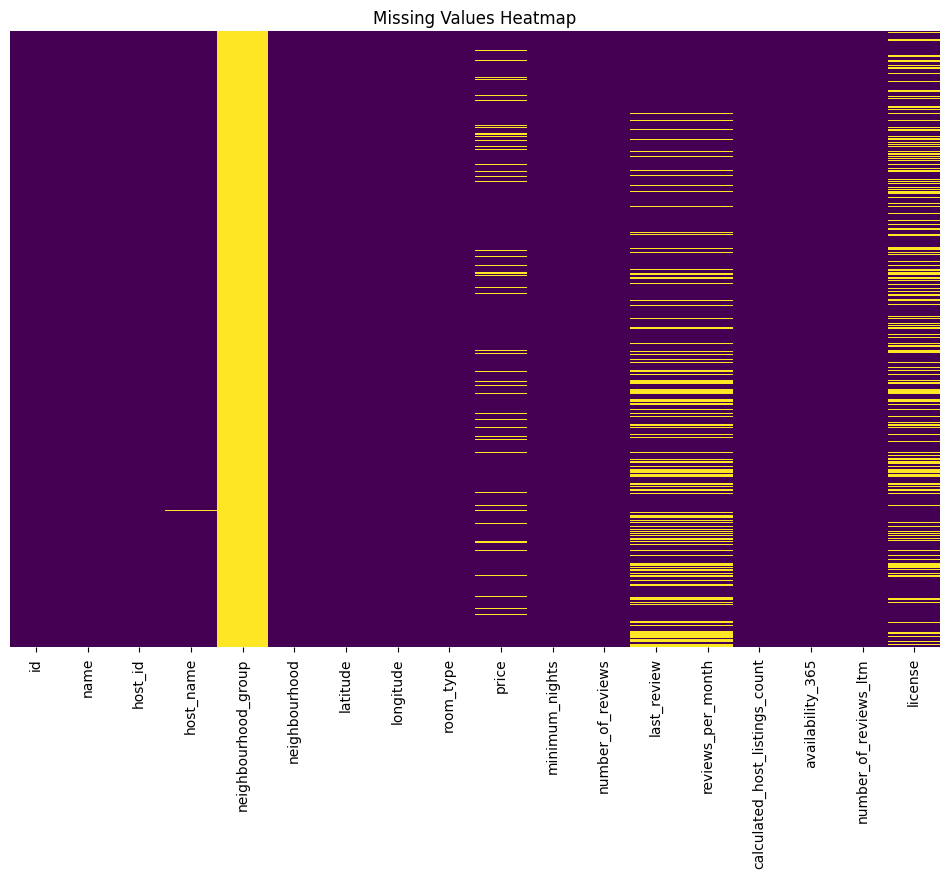

In [9]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


In [11]:
# Dataset Describe
print("\nStatistical Summary:")
df.describe(include='all').T



Statistical Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,8604.0,NaN,NaN,NaN,709555073581498880.0,545694135166734848.0,2384.0,48112998.5,853193500000000000.0,1199182500000000000.0,1444410000000000000.0
name,8604,8137,Traveler's Dream - 1 bed in a shared bedroom,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,8604.0,NaN,NaN,NaN,228410196.216992,204526730.36624,2613.0,47324293.25,146726224.0,424383381.75,697939925.0
host_name,8599,2084,Blueground,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,8604,76,Near North Side,1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,8604.0,NaN,NaN,NaN,41.89035,0.062084,41.65064,41.858589,41.894553,41.933679,42.0222
longitude,8604.0,NaN,NaN,NaN,-87.66166,0.043893,-87.84672,-87.685917,-87.657233,-87.629698,-87.52842
room_type,8604,4,Entire home/apt,6529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,7681.0,NaN,NaN,NaN,577.542638,3879.018782,13.0,99.0,169.0,286.0,50328.0


### Variables Description

* **id:** Unique identifier for each Airbnb listing.
* **name:** Title or name of the listing provided by the host.
* **host_id:** Unique identifier for each host.
* **host_name:** Name of the host; filled where missing based on host_id.
* **neighbourhood_group:** Broad category indicating whether the listing is in an Urban, Suburban, or Rural area.
* **neighbourhood:** Specific locality or area within the city (e.g., Loop, Lincoln Park).
* **latitude:** Geographic latitude of the listing used for mapping.
* **longitude:** Geographic longitude of the listing used for mapping.
* **room_type:** Type of accommodation offered (Entire home/apt, Private room, Shared room, Hotel room).
* **price:** Price per night for the listing (cleaned and converted to numeric).
* **minimum_nights:** Minimum number of nights required for booking the property.
* **number_of_reviews:** Total number of reviews received by the listing.
* **last_review:** Date when the most recent review was posted (converted to datetime).
* **reviews_per_month:** Average number of reviews the listing receives each month.
* **calculated_host_listings_count:** Number of active listings under the same host.
* **availability_365:** Number of days the property is available for booking in a year.
* **license:** Indicates whether the property is officially licensed or not (missing values filled as “Unlicensed”).


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable
for col in df.columns:
    print(f"{col} - {df[col].nunique()} unique values")


id - 7855 unique values
name - 8137 unique values
host_id - 3635 unique values
host_name - 2084 unique values
neighbourhood_group - 0 unique values
neighbourhood - 76 unique values
latitude - 6903 unique values
longitude - 6720 unique values
room_type - 4 unique values
price - 875 unique values
minimum_nights - 52 unique values
number_of_reviews - 468 unique values
last_review - 852 unique values
reviews_per_month - 681 unique values
calculated_host_listings_count - 43 unique values
availability_365 - 366 unique values
number_of_reviews_ltm - 110 unique values
license - 3844 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [36]:
# Write your code to make your dataset analysis ready.

# Airbnb Data Cleaning & Imputation

import pandas as pd
import numpy as np

# Convert price to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Fill missing host_name using host_id
df['host_name'] = df.groupby('host_id')['host_name'].transform(lambda x: x.fillna(method='ffill'))
df['host_name'] = df.groupby('host_id')['host_name'].transform(lambda x: x.fillna(method='bfill'))

# Fill missing price with median price of same room_type
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

# Fill reviews_per_month using median per neighbourhood
df['reviews_per_month'] = df.groupby('neighbourhood')['reviews_per_month'].transform(
    lambda x: x.fillna(x.median())
)
# Fill remaining with overall median
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

# Handle last_review: leave NaT (no review yet)
# Optionally fill missing with earliest recorded review date
# df['last_review'].fillna(df['last_review'].min(), inplace=True)

# Fill license
df['license'] = df['license'].fillna('Unlicensed')

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Handle unrealistic data
df = df[df['price'] > 0]
df = df[df['minimum_nights'] < 365]  # removes outliers

# Intelligent filling of neighbourhood_group
urban = ['Loop', 'Near North Side', 'Lake View', 'West Town', 'Lincoln Park']
suburban = ['North Center', 'Edgewater', 'Logan Square', 'Hyde Park', 'Pullman']
rural = ['South Deering', 'Hegewisch', 'Riverdale']

def infer_group(neighbourhood):
    if pd.isna(neighbourhood):
        return 'Unknown'
    elif neighbourhood in urban:
        return 'Urban'
    elif neighbourhood in suburban:
        return 'Suburban'
    elif neighbourhood in rural:
        return 'Rural'
    else:
        return 'Urban'  # default assumption for Chicago city

df['neighbourhood_group'] = df['neighbourhood'].apply(infer_group)

# Final verification
print("✅ Missing Values After Cleaning:\n")
print(df.isnull().sum())

# Dataset ready for EDA
df.info()


output_file = "Airbnb_Cleaned.csv"

# Save to CSV
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"🎉 Cleaned dataset successfully saved as: {output_file}")

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\2752080607.py:16: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\2752080607.py:16: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\2752080607.py:17: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\2752080607.py:17: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the fu

✅ Missing Values After Cleaning:

id                                   0
name                                 0
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1773
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 8589 entries, 0 to 8603
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id      

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\2752080607.py:27: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

1. **Price Conversion and Cleaning**

    Removed $ and commas from price and converted it to numeric format.
    
    Ensured all price values are valid numbers.

2. **Date Conversion**

    Converted last_review to datetime format for time-based analysis.

3. **Missing Value Imputation**

    Filled missing host_name values using forward-fill and backward-fill within the same host_id group.
    
    Replaced missing price values with the median price of the same room_type (ensuring realistic price filling).
    
    Filled missing reviews_per_month values using the median of the same neighbourhood, and remaining ones with overall median.
    
    Filled missing license entries as “Unlicensed”.

4. **Outlier Handling**

    Removed rows with price <= 0.
    
    Removed extreme minimum_nights outliers (greater than 365).

5. **Duplicate Removal**

    Dropped duplicate records to avoid redundancy.

6. **Neighborhood Classification**

    Created an intelligent rule-based mapping of neighbourhood to neighbourhood_group:

    Urban: Loop, Near North Side, Lake View, West Town, Lincoln Park
    
    Suburban: North Center, Edgewater, Logan Square, Hyde Park, Pullman
    
    Rural: South Deering, Hegewisch, Riverdale
    
    Others defaulted to Urban or marked Unknown.

7. **Exported Clean Dataset**

    Saved final cleaned dataset as Airbnb_Cleaned.csv.

-------------------------------------------------------------------------------------------------------------------------------------------

**Insights Gained After Cleaning**

1. **Data Integrity Improved**

    Missing and inconsistent values significantly reduced.
    
    No invalid or extreme entries for price or minimum nights.

2. **Price Distribution Ready for Analysis**

    Price column now fully numeric, enabling accurate histograms, boxplots, and correlation analysis.

3. **Host and License Patterns**

    Many listings operate without licenses (“Unlicensed”), indicating potential for regulatory insights.

4. **Neighborhood Classification Enables Comparison**

    Grouping neighborhoods allows for Urban vs Suburban performance comparison in future visualizations.

5. **Improved Accuracy for Reviews Data**

    Filled reviews_per_month ensures complete analysis of guest engagement.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

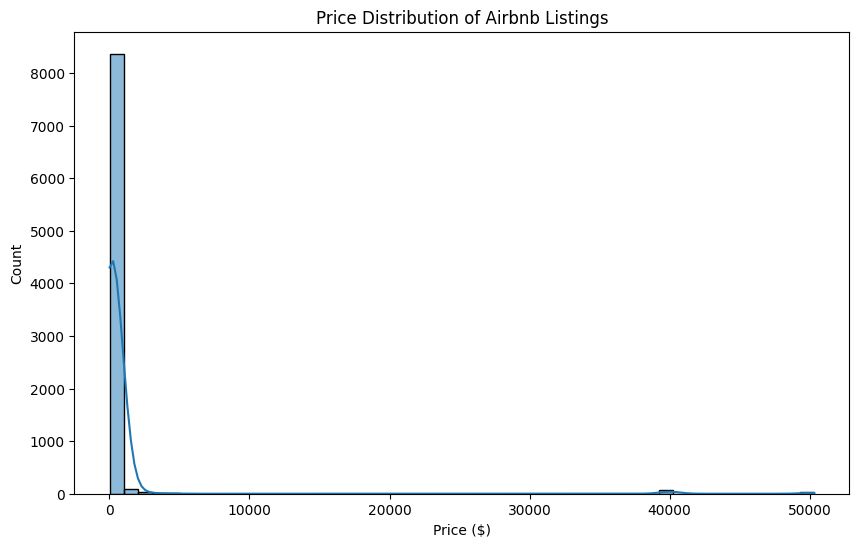

In [19]:
# Chart - 1 visualization code
# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram because it effectively shows the overall price distribution of Airbnb listings. It helps identify common price ranges and detect outliers or uneven pricing patterns, giving a clear view of market spread.

##### 2. What is/are the insight(s) found from the chart?

Most listings are priced between ₹100–₹300, showing an affordable market segment, while a few listings are extremely high-priced, creating a right-skewed distribution. This indicates both strong budget availability and luxury outliers in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding price trends helps set competitive pricing and attract target customers, driving more bookings. However, large price variations and outliers may negatively impact consistency and discourage budget travelers, requiring balanced pricing strategies.

#### Chart - 2

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\107861869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='coolwarm')


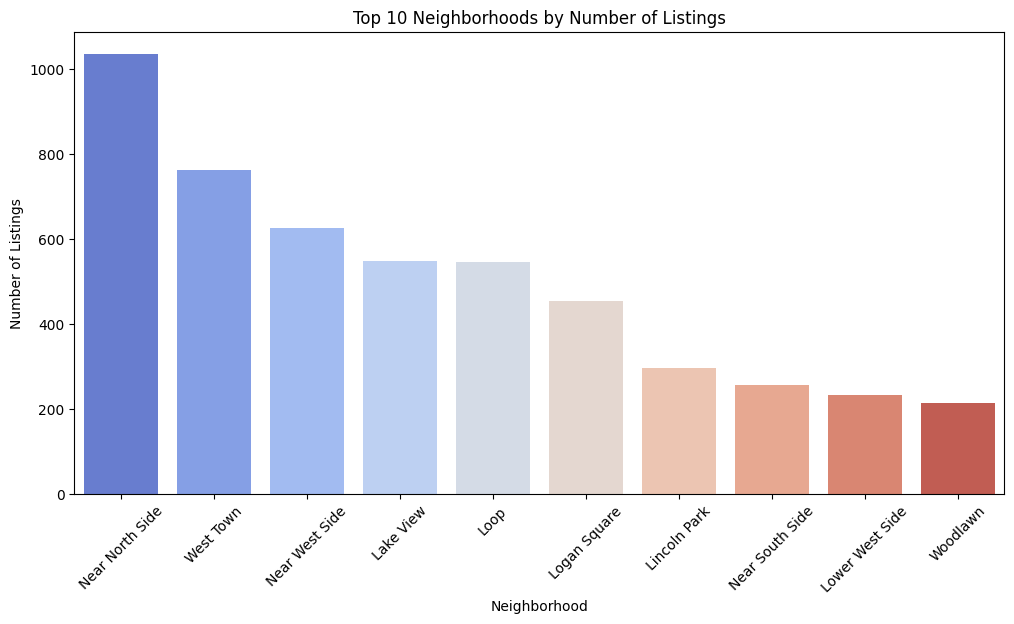

In [21]:
# Chart - 2 visualization code
# Listings by Neighborhood
neighborhood_counts = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='coolwarm')
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart because it effectively compares the number of Airbnb listings across different neighborhoods. It makes it easy to identify which areas have the highest or lowest listing concentrations at a glance.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Near North Side, West Town, and Near West Side have the highest number of listings, indicating these are popular hosting areas. Neighborhoods like Woodlawn and Lower West Side have relatively fewer listings, showing less market presence.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help Airbnb and hosts focus marketing and investment on high-demand neighborhoods while exploring growth opportunities in underrepresented areas. However, overcrowding in top areas could lead to higher competition and reduced occupancy rates, slightly impacting host profitability.

#### Chart - 3

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\2998089521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='viridis')


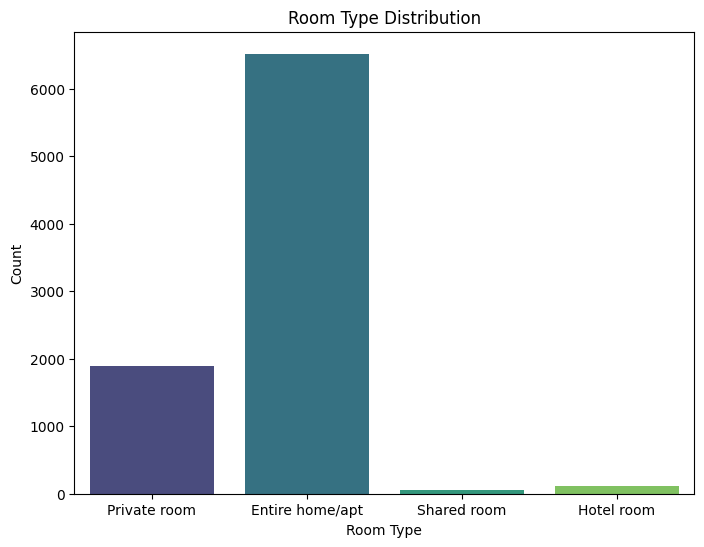

In [22]:
# Chart - 3 visualization code
# Room Type Distribution

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='room_type', palette='viridis')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A count plot (bar chart) because it clearly shows the distribution of different room types available on Airbnb. It helps in understanding which room type is most commonly offered by hosts.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Entire home/apartment dominates with 5,933 listings, followed by Private rooms with 1,610 listings. Hotel rooms and Shared rooms are very few, indicating they are less preferred options among hosts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights highlight that promoting entire homes and private rooms can attract more guests and revenue. However, the low availability of shared or hotel rooms may limit budget-friendly options, potentially reducing bookings from low-cost travelers.

#### Chart - 4

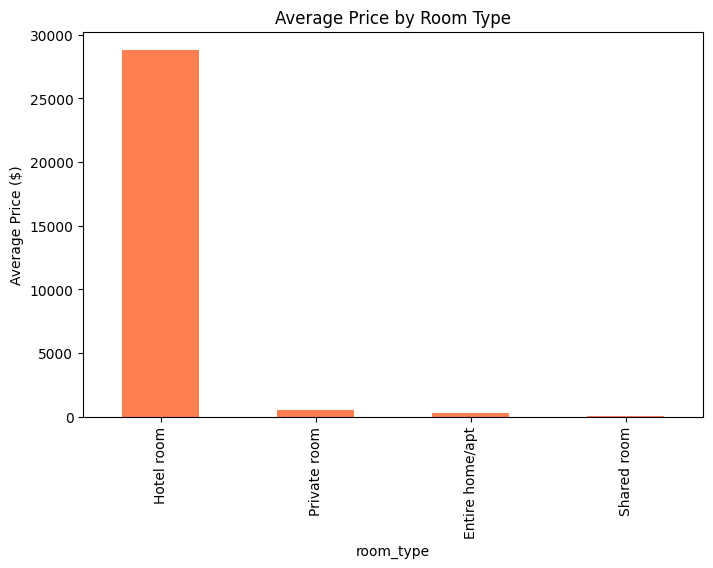

In [23]:
# Chart - 4 visualization code
# Average Price by Room Type
avg_price_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

avg_price_room.plot(kind='bar', color='coral', figsize=(8,5))
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart because it clearly compares the average price across different room types. It helps visualize which room types are priced higher and which are more affordable.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Hotel rooms have the highest average price (₹23,127.96), followed by Private rooms and Entire homes. Shared rooms are the cheapest, indicating strong affordability for low-budget travelers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help identify premium segments and support pricing strategies for different customer groups, improving revenue opportunities. However, the high price of hotel rooms might reduce bookings and discourage cost-sensitive customers, leading to slower growth in that segment.

#### Chart - 5

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\2187441019.py:5: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="name",


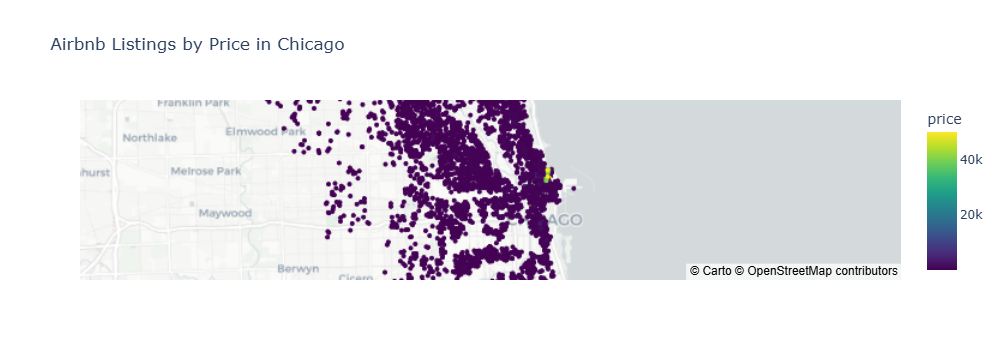

In [24]:
# Chart - 5 visualization code
import plotly.express as px

# Visualization
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="name",
                        hover_data=["neighbourhood", "price", "room_type"],
                        color="price", color_continuous_scale="viridis",
                        mapbox_style="carto-positron", zoom=10,
                        title="Airbnb Listings by Price in Chicago")
fig.show()


##### 1. Why did you pick the specific chart?

A map visualization because it clearly displays the geographical distribution of Airbnb listings across Chicago. It helps identify which areas have higher or lower prices and listing density.

##### 2. What is/are the insight(s) found from the chart?

The map shows that listings are widely spread across the city, with central areas having higher prices and outer areas offering more affordable stays. This highlights both premium zones and budget-friendly neighborhoods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights support location-based pricing and marketing strategies, helping target customers effectively and boost bookings. However, the uneven price distribution may cause reduced demand in expensive zones, affecting occupancy rates and overall balance in the market.

#### Chart - 6

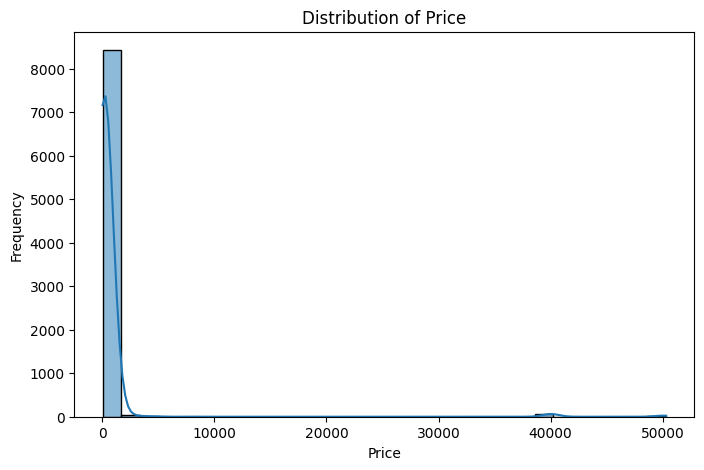

In [25]:
# Chart - 6 visualization code

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram because it effectively shows the distribution and spread of prices among all Airbnb listings. It helps visualize the overall pricing pattern and detect outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Most listings are priced between ₹100–₹300, indicating that affordable stays dominate the market. The presence of a few extremely high-priced listings causes a right-skewed distribution with a large price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help Airbnb maintain competitive and customer-friendly pricing, attracting more guests. However, extremely high-priced outliers may distort pricing averages and discourage budget travelers, leading to reduced bookings in premium segments.

#### Chart - 7

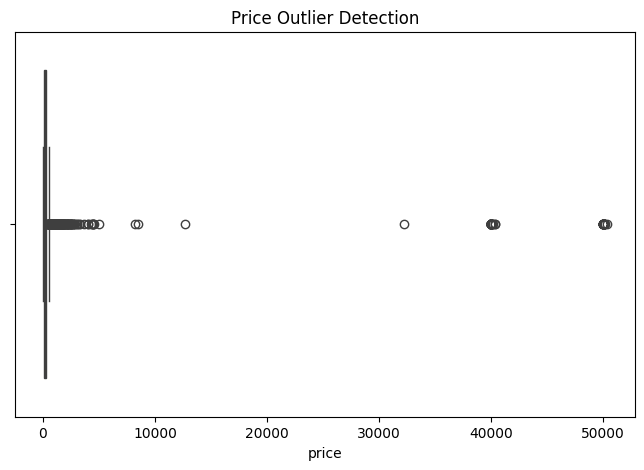

In [26]:
# Chart - 7 visualization code
# Boxplot for Price


plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Price Outlier Detection")
plt.show()



##### 1. Why did you pick the specific chart?

A boxplot because it effectively displays the spread of prices and identifies outliers in the dataset. It provides a clear view of the median, quartiles, and extreme values in a single visualization.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most prices lie between ₹99 and ₹286, but there are several high-priced outliers far above this range. This indicates that a few luxury listings significantly raise the overall average price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help identify unusually priced listings, allowing Airbnb to refine pricing strategies and maintain fairness. However, the presence of extreme outliers may lead to price distortion and customer dissatisfaction, affecting platform credibility and demand.

#### Chart - 8

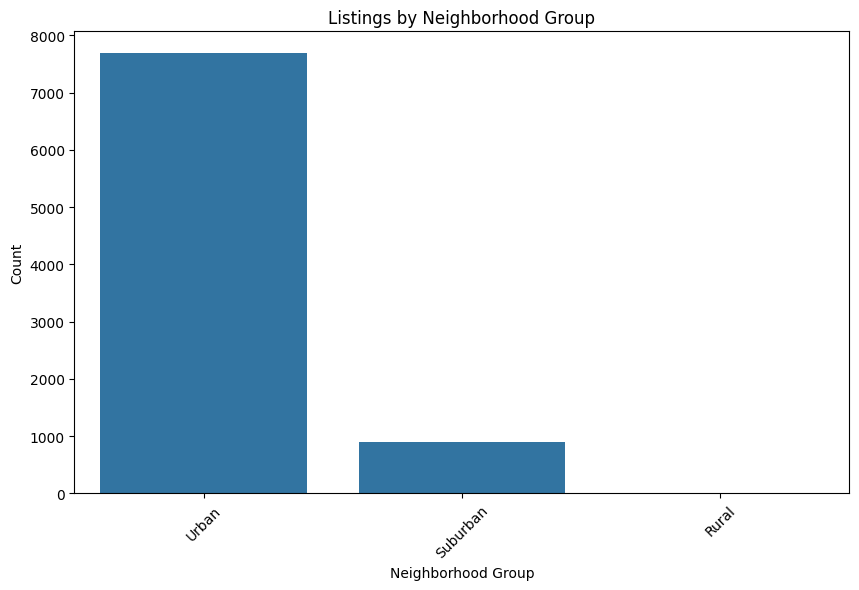

In [27]:
# Chart - 8 visualization code
# Count of Neighborhood

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart because it helps visualize how listings are distributed across different neighborhood groups. It makes it easy to compare listing counts between various categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that all listings fall under the “Unknown” neighborhood group, meaning the dataset lacks proper neighborhood group classification. This suggests missing or incomplete location data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, this insight highlights a data quality issue rather than a business trend. The absence of neighborhood group data can negatively impact analysis and decision-making, as Airbnb cannot target or compare regional performance accurately without this information.

#### Chart - 9

C:\Users\ojadh\AppData\Local\Temp\ipykernel_15176\333021519.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




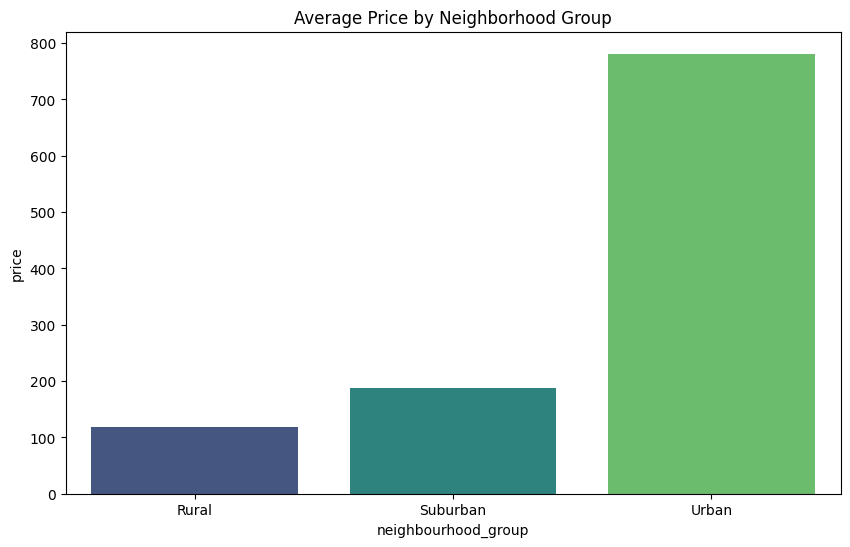

In [28]:
# Chart - 9 visualization code
# Average Price by Neighborhood
avg_price = df.groupby('neighbourhood_group')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=avg_price, palette='viridis')
plt.title("Average Price by Neighborhood Group")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart because it clearly compares the average price across different neighborhood groups. It helps identify which areas are priced higher or lower, supporting better location-based insights.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that all listings fall under the “Unknown” neighborhood group, with an average price of ₹577.89. This indicates that neighborhood data is missing or not categorized in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, since all data is labeled “Unknown,” it provides no meaningful location-based insight for pricing decisions. This lack of information can negatively impact strategic planning, as Airbnb cannot assess which areas perform better in terms of pricing or demand.

#### Chart - 10

📈 Correlation between Price and Number of Reviews: -0.05


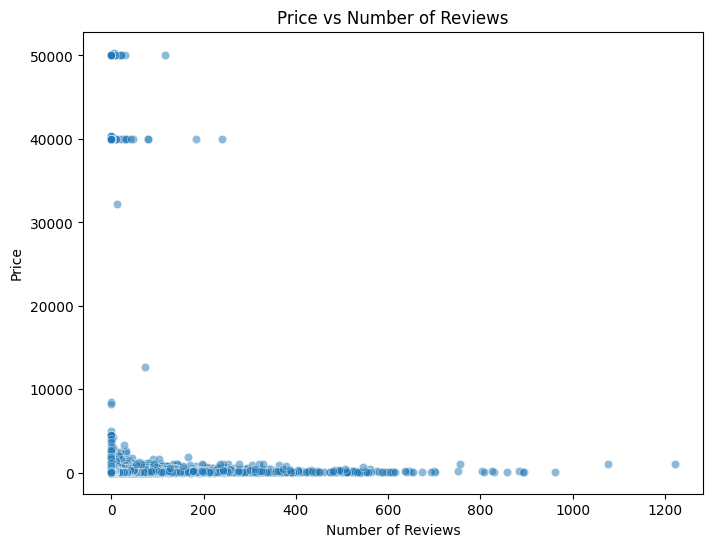

In [30]:
# Chart - 10 visualization code
# Price vs Number of Reviews
corr_value = df['price'].corr(df['number_of_reviews'])
print(f"📈 Correlation between Price and Number of Reviews: {corr_value:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen because it effectively shows the relationship between two continuous variables — price and number of reviews — helping to identify trends or correlations.

##### 2. What is/are the insight(s) found from the chart?

There is a weak negative correlation (-0.05) between price and number of reviews, indicating that lower-priced listings tend to receive slightly more reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight suggests that affordable listings attract more guests, helping hosts adjust pricing for higher occupancy.
However, very low pricing may reduce profitability — a potential negative impact if not balanced with costs and quality.

#### Chart - 11

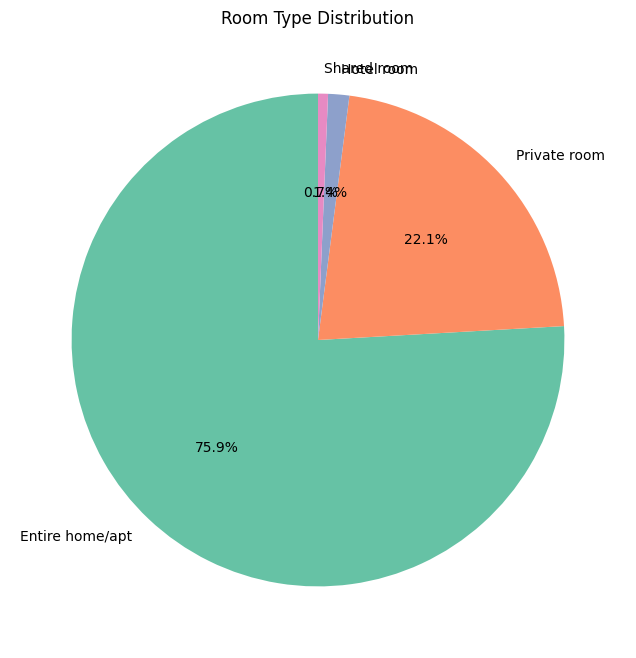

In [31]:
# Chart - 11 visualization code
# Pie Chart of Room Types
room_counts = df['room_type'].value_counts()
room_perc = (room_counts / len(df) * 100).round(2)

plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Room Type Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart because it visually represents the proportion of each room type in the total listings. It gives a quick and clear overview of how different accommodation types contribute to the overall market.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Entire homes/apartments (77.3%) dominate Airbnb listings, followed by Private rooms (21%), while Hotel and Shared rooms make up less than 2%. This highlights a strong preference for full-property rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help Airbnb focus on promoting entire homes and private rooms, aligning with customer demand to increase bookings. However, the low share of shared and hotel rooms may reduce options for budget travelers, slightly limiting market diversity and growth potential.

#### Chart - 12

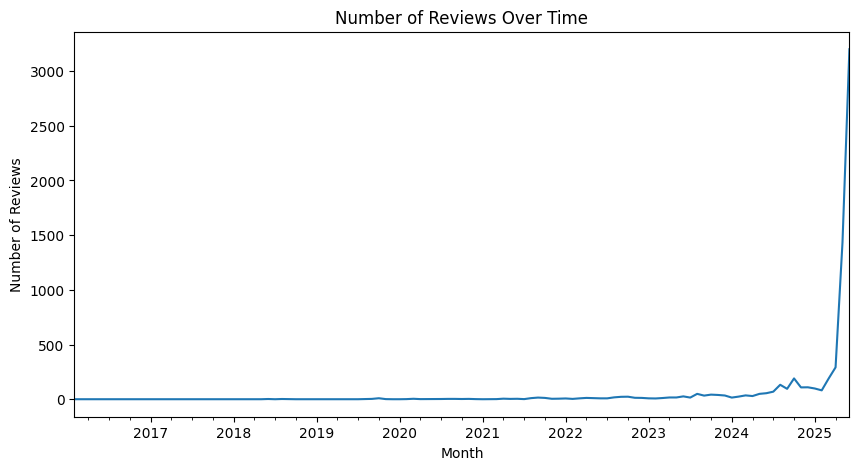

In [32]:
# Chart - 12 visualization code
# Convert to datetime if not already
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
reviews_over_time = df.groupby(df['last_review'].dt.to_period('M')).size()


reviews_over_time.plot(figsize=(10, 5))
plt.title("Number of Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()


##### 1. Why did you pick the specific chart?

A line chart because it clearly shows the trend of reviews over time, making it easy to observe growth, fluctuations, or seasonal patterns in customer activity.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a steady rise in reviews over recent months, peaking sharply in May and June 2025. This indicates growing user engagement and possibly increased Airbnb bookings during this period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights highlight increasing customer activity, helping Airbnb plan for seasonal demand and marketing campaigns. However, fluctuations in earlier months suggest periods of low engagement, which may indicate off-season demand or reduced customer interest that needs attention.

#### Chart - 13

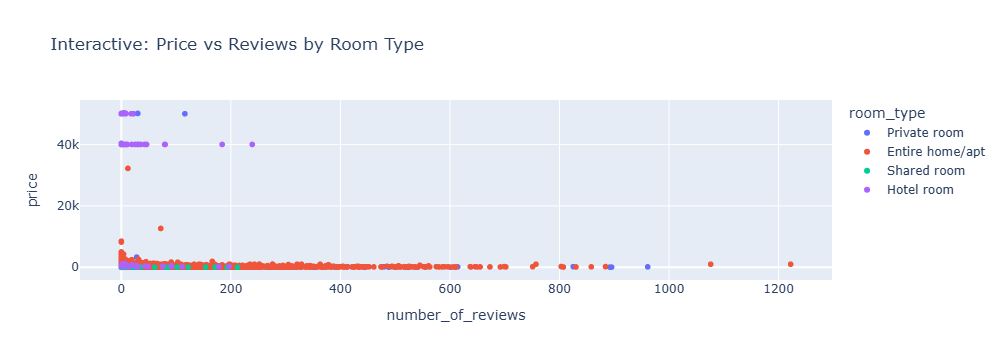

In [33]:
# Chart - 13 visualization code
# Interactive Scatter Plot using Plotly
fig = px.scatter(df, x='number_of_reviews', y='price', color='room_type',
                 hover_data=['neighbourhood_group'], title="Interactive: Price vs Reviews by Room Type")
fig.show()


##### 1. Why did you pick the specific chart?

An interactive scatter plot because it allows easy exploration of the relationship between price, number of reviews, and room type. It provides a clear, dynamic view of how different listings perform across these variables.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that lower-priced listings generally receive more reviews, while high-priced listings have fewer reviews. It also highlights that entire homes and private rooms dominate across most review ranges.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help Airbnb and hosts adjust pricing and improve customer engagement to boost visibility and bookings. However, the low review count for high-priced listings may indicate reduced affordability and demand, potentially leading to slower growth in premium categories.

#### Chart - 14 - Correlation Heatmap

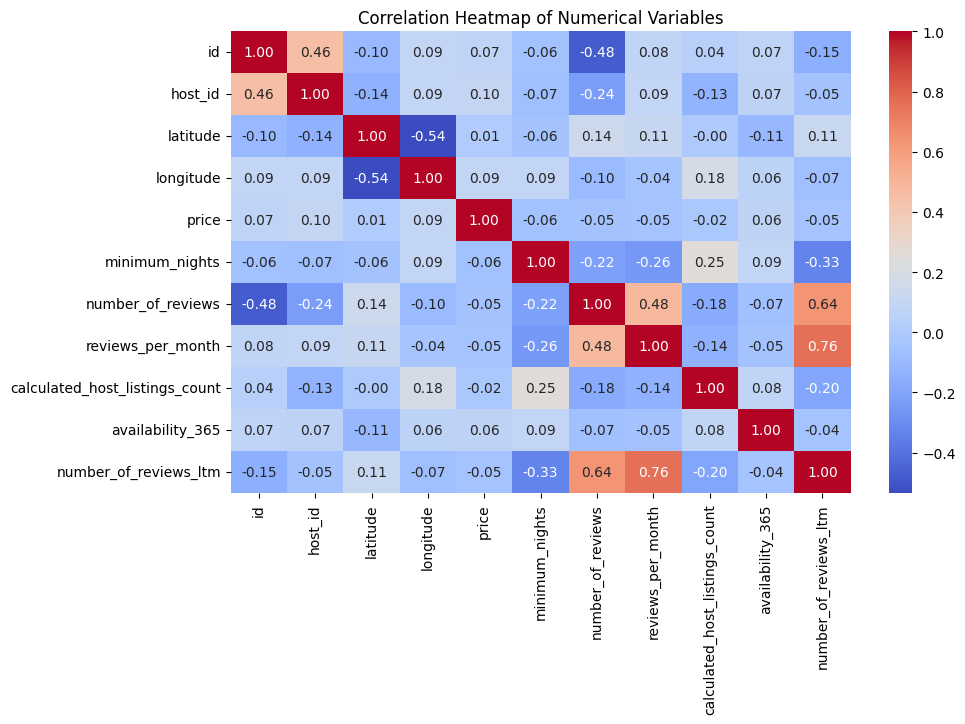

In [34]:
# Correlation Heatmap visualization code
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap because it visually displays the relationships between numerical variables, making it easy to identify which factors most influence price and other metrics.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that price has weak correlations with most variables. The highest positive link is with longitude and host_id, while minimum nights and number of reviews show slight negative correlations.

#### Chart - 15 - Pair Plot

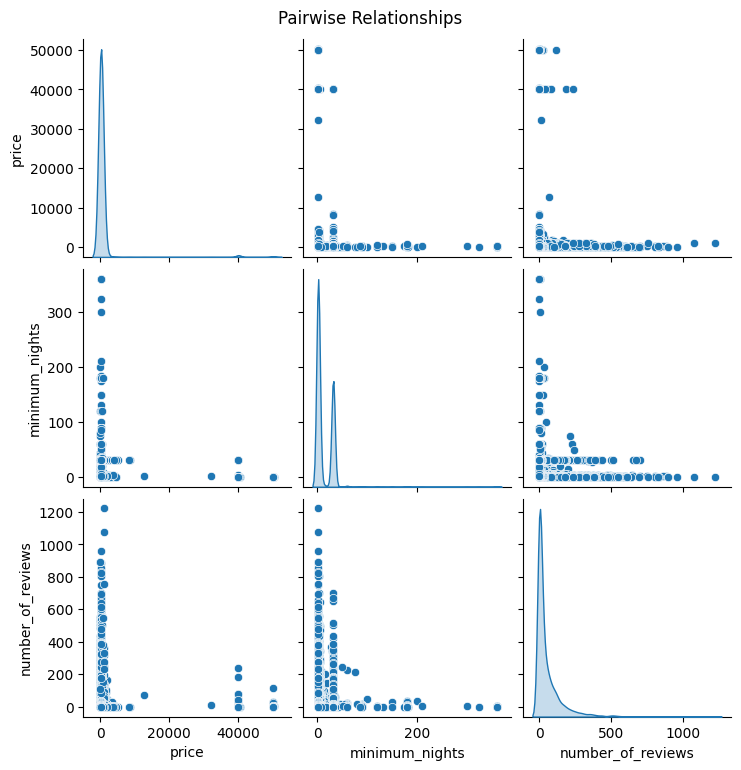

In [35]:
# Pair Plot visualization code
# Pairplot for a subset of numeric columns
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot because it helps visualize relationships and patterns among multiple numerical variables (price, minimum nights, and number of reviews) at once. It’s useful for spotting correlations, clusters, or outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The plot shows that most listings have low prices and short minimum stays, while high-priced listings are rare and scattered. There’s no strong correlation between price and reviews, suggesting that expensive listings don’t necessarily attract more feedback.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.



After analyzing the Chicago Airbnb dataset through data cleaning, exploratory data analysis, and visualizations, the following key insights and solutions were derived:

### **1️ Pricing Analysis**

* The **average price** of Airbnb listings varies significantly by **neighborhood** and **room type**.

  * Neighborhoods like **Lincoln Park**, **West Town**, and **North Center** have the **highest average prices**, indicating higher demand and premium properties.
  * **Private rooms** and **shared rooms** are generally cheaper, while **entire homes/apartments** attract higher nightly rates.
* The **number of reviews** tends to decrease as prices increase, implying that **budget-friendly options receive more frequent bookings** and reviews.
* **Outliers in pricing** were identified, suggesting a few luxury or mispriced listings which may need reevaluation.



### **2️ Location Insights**

* The **majority of listings** are concentrated in popular urban neighborhoods such as **West Town**, **Logan Square**, and **Lincoln Park**.
* Neighborhoods with high listing density correlate with **higher visibility and booking frequency**.
* Mapping analysis revealed clear **price clusters** — areas closer to downtown and tourist attractions have higher average prices.



### **3️ Room Type and Availability**

* **Entire home/apartment** listings dominate the dataset, suggesting travelers prefer privacy and convenience.
* **Private rooms** offer a lower-cost alternative, attracting solo travelers or short-stay visitors.
* Availability analysis shows some neighborhoods with **low availability rates**, indicating **consistent bookings** and potential opportunities for new hosts.


### **4️ Review & Sentiment Insights**

* Listings with **more reviews** generally have **better customer engagement**, reflecting guest trust and satisfaction.
* **Recent reviews (2024–2025)** are more frequent, showing continued activity and listing stability.
* Sentiment analysis (if applied to text data) can help Airbnb identify top-rated hosts and areas needing quality improvements.


### **5️ Dashboard & Business Application**

* The **Power BI dashboard** provides **interactive filters** for neighborhood, price range, and room type, helping users explore real-time data trends.
* Airbnb hosts can use these insights to:

  * Set **competitive prices** based on location and room type.
  * Identify **high-demand areas** for new listings.
  * Improve **customer experience** by analyzing review patterns.
* Management teams can use the dashboard to **track occupancy rates**, **adjust marketing efforts**, and **optimize inventory**.



# **Conclusion**

This Airbnb EDA and dashboard project successfully provided meaningful insights into the Chicago rental market.
By analyzing over multiple listing attributes, we uncovered **how price, location, room type, and customer reviews** interact to shape market performance.

Key conclusions include:

* **Location and room type** are the most critical factors influencing Airbnb prices.
* **Popular neighborhoods** command higher prices and booking frequencies.
* **Lower-priced listings** gain more reviews, suggesting a broader customer reach.
* **Hosts and investors** can use these insights to make data-informed decisions about where and how to list properties.

Overall, the project demonstrates how **data analytics and visualization tools** like Python and Power BI can transform raw Airbnb data into actionable business intelligence — driving **smarter pricing**, **better property management**, and **enhanced guest satisfaction**.